In [1]:
#import main packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

In [2]:
#import main csv files
traindata = pd.read_csv('fraudTrain.csv')
testdata = pd.read_csv('fraudTest.csv')

In [3]:
traindata.head()
testdata.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0


In [188]:
data.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
1002099,1002099,2/15/2020 16:40,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0
1002100,1002100,2/15/2020 16:40,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0
1002101,1002101,2/15/2020 16:42,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0
1002102,1002102,2/15/2020 16:42,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0
1002103,1002103,2/15/2020 16:43,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN


In [189]:
# feature engineering

In [4]:
# converting Time to dateTime class object
traindata['Time'] = pd.to_datetime(traindata['Time'])
testdata['Time'] = pd.to_datetime(testdata['Time'])

In [5]:
print(testdata['Time'].head())
print(traindata['Time'].head())

0   2020-06-21 12:14:00
1   2020-06-21 12:14:00
2   2020-06-21 12:14:00
3   2020-06-21 12:15:00
4   2020-06-21 12:15:00
Name: Time, dtype: datetime64[ns]
0   2019-01-01 00:00:00
1   2019-01-01 00:00:00
2   2019-01-01 00:00:00
3   2019-01-01 00:01:00
4   2019-01-01 00:03:00
Name: Time, dtype: datetime64[ns]


In [6]:
print(traindata['Time'].describe())

count                          1002104
mean     2019-08-04 22:56:49.627184128
min                2019-01-01 00:00:00
25%                2019-05-05 11:43:00
50%                2019-08-05 16:02:30
75%                2019-11-17 17:16:00
max                2020-02-15 16:43:00
Name: Time, dtype: object


In [7]:
# adding mont and day and year to the dataset

traindata['Day'] = traindata['Time'].dt.day
traindata['Month'] = traindata['Time'].dt.month
traindata['Year'] = traindata['Time'].dt.year


testdata['Day'] = testdata['Time'].dt.day
testdata['Month'] = testdata['Time'].dt.month
testdata['Year'] = testdata['Time'].dt.year


In [8]:
testdata.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0,21,6,2020
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0,21,6,2020
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0,21,6,2020
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0,21,6,2020
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0,21,6,2020


In [9]:
traindata.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year
1002099,1002099,2020-02-15 16:40:00,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0,15,2,2020
1002100,1002100,2020-02-15 16:40:00,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0,15,2,2020
1002101,1002101,2020-02-15 16:42:00,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0,15,2,2020
1002102,1002102,2020-02-15 16:42:00,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0,15,2,2020
1002103,1002103,2020-02-15 16:43:00,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN,15,2,2020


In [10]:
# adding hour and minute to the dataset
traindata['Hour'] = traindata['Time'].dt.hour
traindata['Minute'] = traindata['Time'].dt.minute

testdata['Hour'] = testdata['Time'].dt.hour
testdata['Minute'] = testdata['Time'].dt.minute

In [11]:
testdata.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0,21,6,2020,12,14
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0,21,6,2020,12,14
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0,21,6,2020,12,14
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0,21,6,2020,12,15
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0,21,6,2020,12,15


In [12]:
traindata.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
1002099,1002099,2020-02-15 16:40:00,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0,15,2,2020,16,40
1002100,1002100,2020-02-15 16:40:00,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0,15,2,2020,16,40
1002101,1002101,2020-02-15 16:42:00,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0,15,2,2020,16,42
1002102,1002102,2020-02-15 16:42:00,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0,15,2,2020,16,42
1002103,1002103,2020-02-15 16:43:00,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN,15,2,2020,16,43


In [13]:
# no need for the time column, it has been substituted with day, month, year and time
traindata = traindata.drop(['Time'], axis=1)
testdata = testdata.drop(['Time'], axis=1)


In [14]:
traindata.head()

,ID,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
0,0,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,1,1,2019,0,0
1,1,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,1,1,2019,0,0
2,2,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,1,1,2019,0,0
3,3,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,1,1,2019,0,1
4,4,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,1,1,2019,0,3


In [15]:
#the number of unique value 
print(traindata['is_fraud'].nunique())
print(traindata['is_fraud'].unique())

print('------------------------------')
print(testdata['is_fraud'].nunique())
print(testdata['is_fraud'].unique())

2
[ 0.  1. nan]
------------------------------
2
[0 1]


In [202]:
# data cleansing

In [18]:
print(pd.value_counts(traindata['is_fraud']))
print(pd.value_counts(testdata['is_fraud']))


is_fraud
0.0    996390
1.0      5713
Name: count, dtype: int64
is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [20]:
traindata.shape

(1002104, 14)

In [21]:
testdata.shape


(555719, 14)

In [22]:
#count the number of nulls
print(traindata.isnull().sum())
print(testdata.isnull().sum())


ID             0
Card Number    0
merchant       0
category       0
Amount         1
firstName      1
lastName       1
trans_num      1
is_fraud       1
Day            0
Month          0
Year           0
Hour           0
Minute         0
dtype: int64
ID             0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
Day            0
Month          0
Year           0
Hour           0
Minute         0
dtype: int64


In [23]:
# dropping nan raws
traindata.dropna(inplace = True)
print(traindata['is_fraud'].max())

1.0


In [24]:
traindata['is_fraud'] = traindata['is_fraud'].astype(int)


In [25]:
traindata.shape

(1002103, 14)

In [26]:
#count the number of nulls
print(traindata.isnull().sum())

ID             0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
Day            0
Month          0
Year           0
Hour           0
Minute         0
dtype: int64


In [210]:
#Histogram of columns

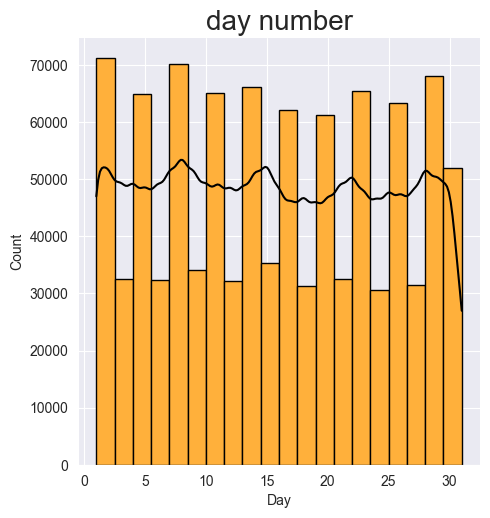

In [211]:
sns.displot(x=traindata['Day'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("day number",size=20)
plt.show()

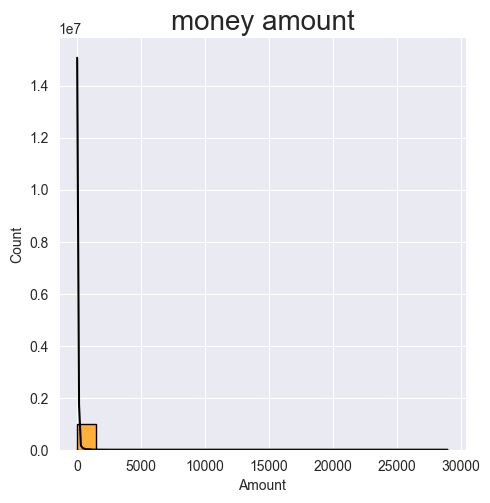

In [212]:
sns.displot(x=traindata['Amount'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("money amount",size=20)
plt.show()

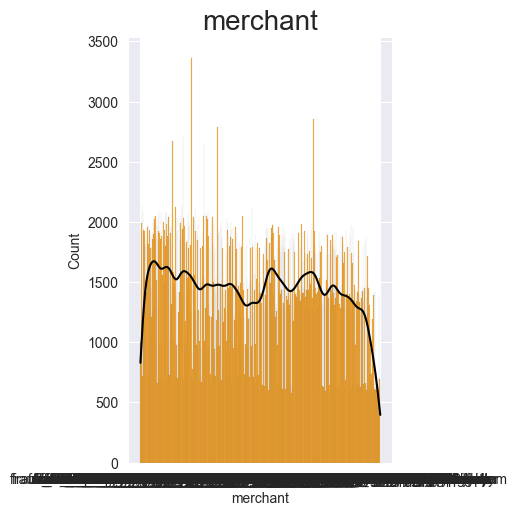

In [213]:
sns.displot(x=traindata['merchant'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("merchant",size=20)
plt.show()

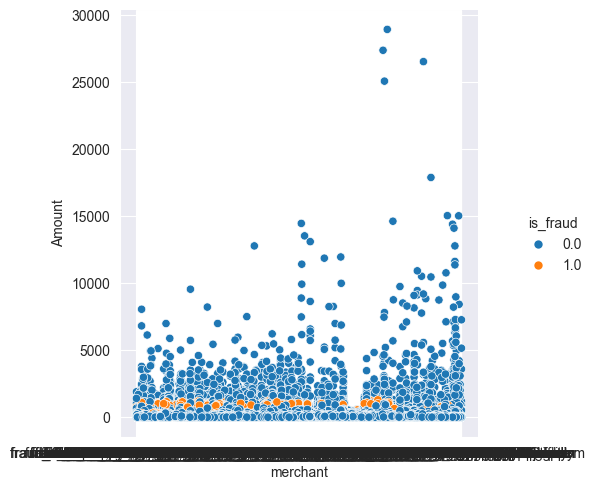

In [214]:
sns.relplot(x='merchant',y='Amount',data=traindata,kind='scatter',hue='is_fraud',height=5)
plt.show()

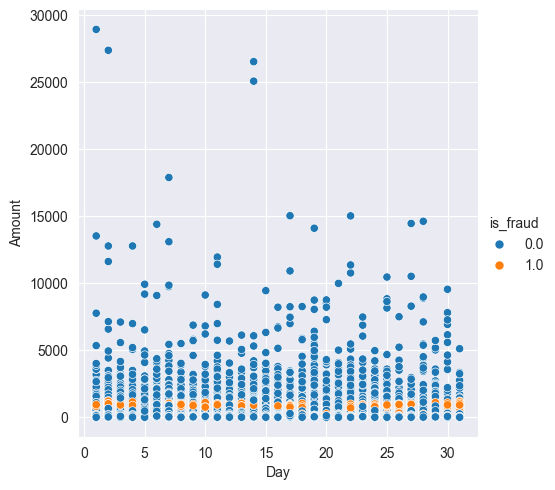

In [215]:
sns.relplot(x='Day',y='Amount',data=traindata,kind='scatter',hue='is_fraud',height=5)
plt.show()

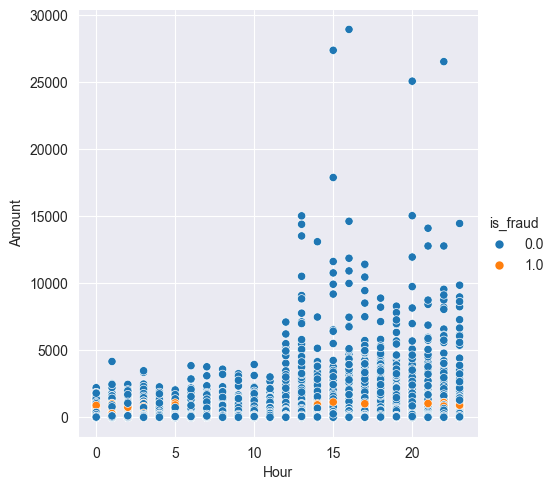

In [216]:
sns.relplot(x='Hour',y='Amount',data=traindata,kind='scatter',hue='is_fraud',height=5)
plt.show()

In [27]:
#print all datatypes of objects
traindata.select_dtypes(include=['object']).columns

Index(['merchant', 'category', 'firstName', 'lastName', 'trans_num'], dtype='object')

In [28]:
#Encoding object columns in traindata
label_encoding=preprocessing.LabelEncoder()
cols=['merchant', 'category', 'firstName', 'lastName', 'trans_num']
for i in cols:
    traindata[i]=label_encoding.fit_transform(traindata[i])



In [30]:
#Encoding object columns in testdata
label_encoding=preprocessing.LabelEncoder()
cols=['merchant', 'category', 'firstName', 'lastName', 'trans_num']
for i in cols:
    testdata[i]=label_encoding.fit_transform(testdata[i])

In [31]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ID           1002103 non-null  int64  
 1   Card Number  1002103 non-null  float64
 2   merchant     1002103 non-null  int32  
 3   category     1002103 non-null  int32  
 4   Amount       1002103 non-null  float64
 5   firstName    1002103 non-null  int32  
 6   lastName     1002103 non-null  int32  
 7   trans_num    1002103 non-null  int32  
 8   is_fraud     1002103 non-null  int32  
 9   Day          1002103 non-null  int32  
 10  Month        1002103 non-null  int32  
 11  Year         1002103 non-null  int32  
 12  Hour         1002103 non-null  int32  
 13  Minute       1002103 non-null  int32  
dtypes: float64(2), int32(11), int64(1)
memory usage: 72.6 MB


In [33]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           555719 non-null  int64  
 1   Card Number  555719 non-null  float64
 2   merchant     555719 non-null  int32  
 3   category     555719 non-null  int32  
 4   Amount       555719 non-null  float64
 5   firstName    555719 non-null  int32  
 6   lastName     555719 non-null  int32  
 7   trans_num    555719 non-null  int32  
 8   is_fraud     555719 non-null  int64  
 9   Day          555719 non-null  int32  
 10  Month        555719 non-null  int32  
 11  Year         555719 non-null  int32  
 12  Hour         555719 non-null  int32  
 13  Minute       555719 non-null  int32  
dtypes: float64(2), int32(10), int64(2)
memory usage: 38.2 MB


In [35]:
testdata.head()

,ID,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
0,0,2.291160e+15,319,10,2.86,151,115,98699,0,21,6,2020,12,14
1,1,3.573030e+15,591,10,29.84,163,457,108785,0,21,6,2020,12,14
2,2,3.598220e+15,611,5,41.28,24,249,433979,0,21,6,2020,12,14
3,3,3.591920e+15,222,9,60.05,42,457,71993,0,21,6,2020,12,15
4,4,3.526830e+15,292,13,3.19,247,261,190585,0,21,6,2020,12,15


In [36]:
# check if any data is duplicated
testdata.duplicated().sum()

0

In [37]:
traindata.duplicated().sum()

0

<Axes: >

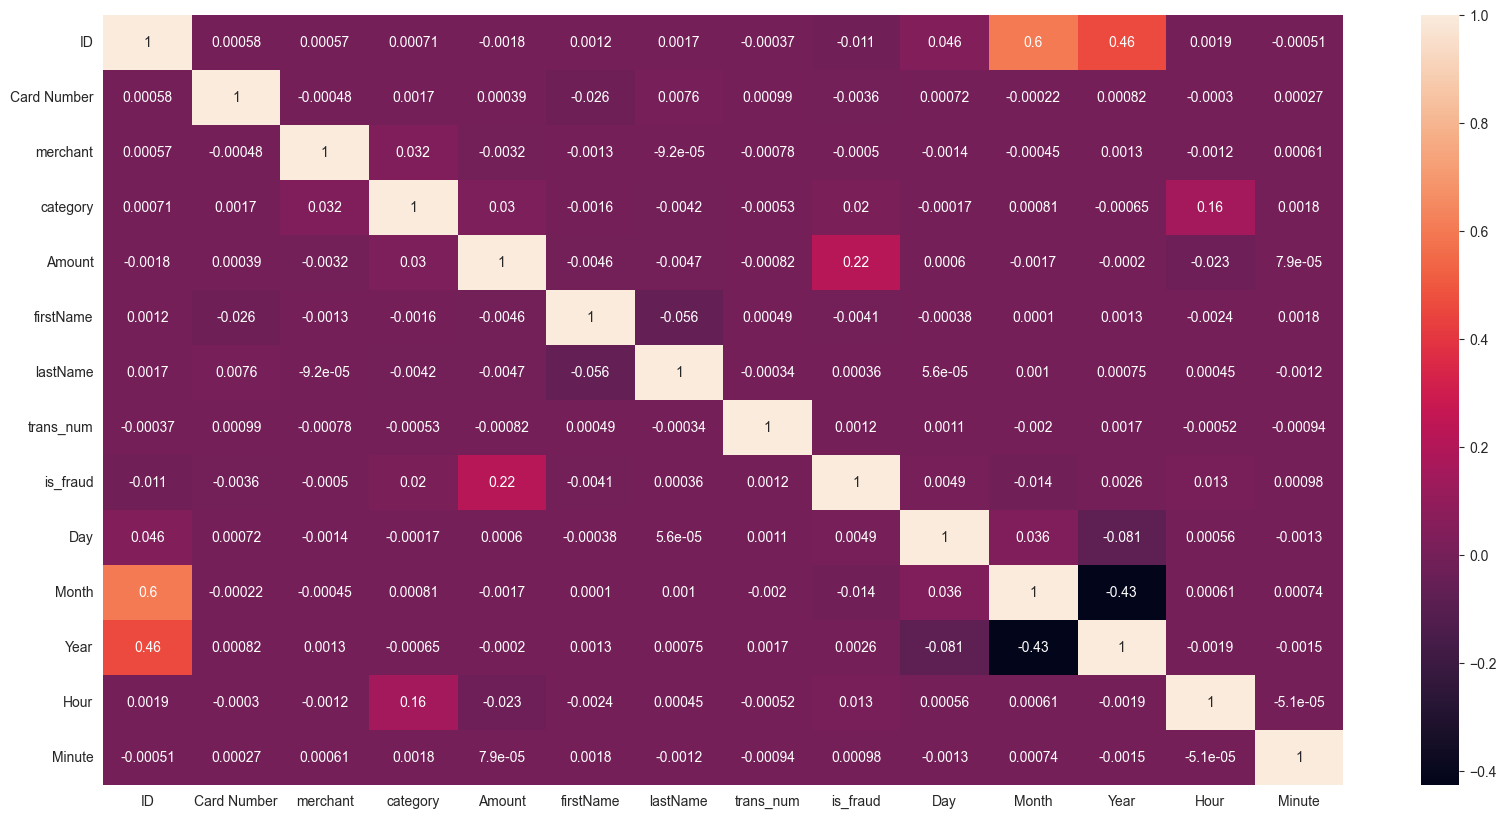

In [38]:
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(traindata.corr(),annot = True)


In [42]:
testdata.dropna(inplace = True)

<Axes: >

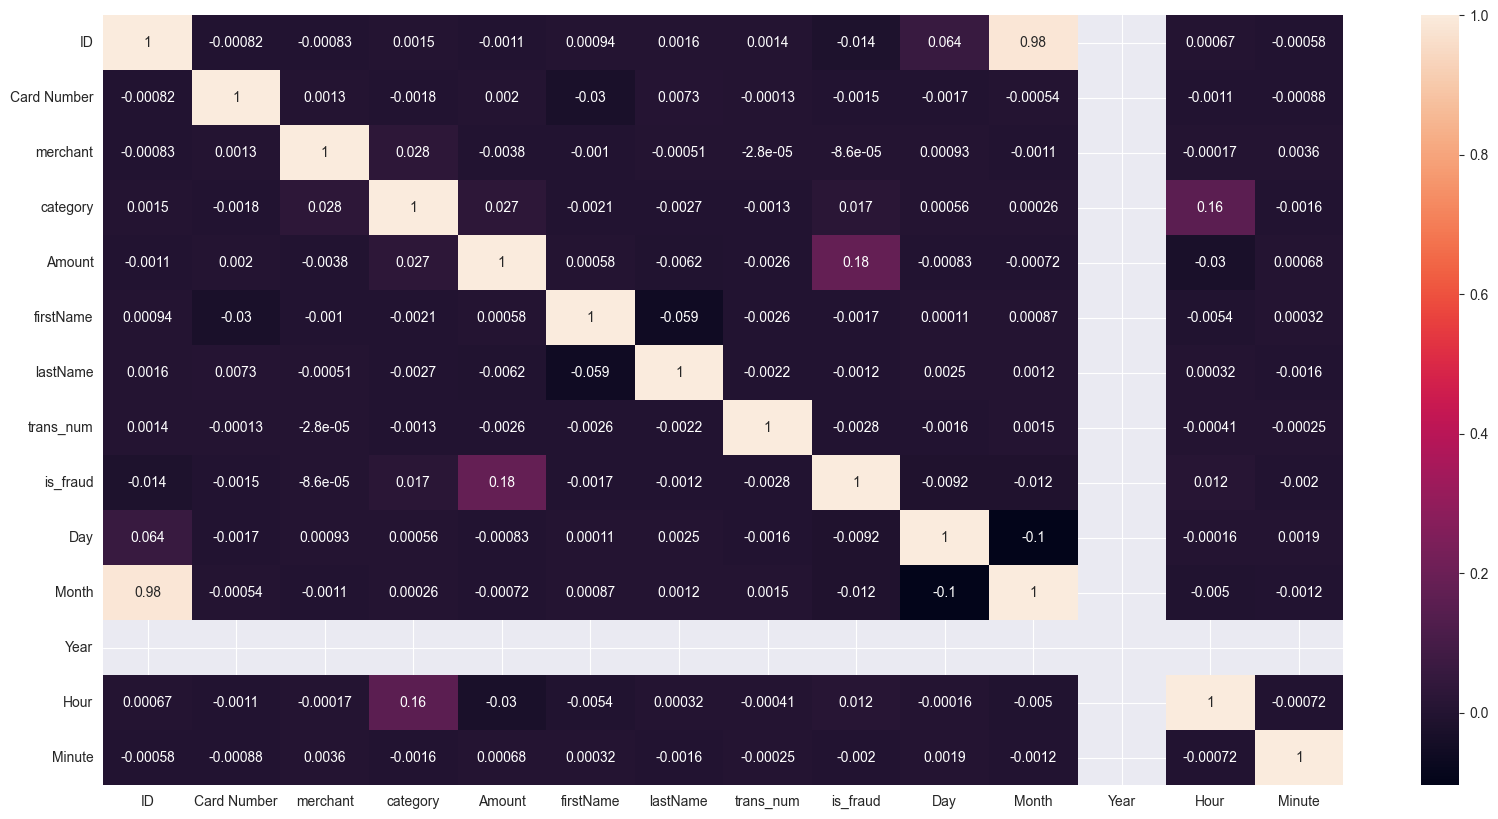

In [43]:
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(testdata.corr(),annot = True)

In [226]:
traindata.corr()

,ID,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
ID,1.000000,0.000582,0.000572,0.000707,-0.001782,0.001215,0.001662,-0.000372,-0.010520,0.046392,0.600288,0.462000,0.001909,-0.000505
Card Number,0.000582,1.000000,-0.000482,0.001692,0.000386,-0.026224,0.007646,0.000991,-0.003599,0.000723,-0.000224,0.000816,-0.000296,0.000267
merchant,0.000572,-0.000482,1.000000,0.032146,-0.003202,-0.001336,-0.000092,-0.000775,-0.000502,-0.001442,-0.000454,0.001287,-0.001230,0.000607
category,0.000707,0.001692,0.032146,1.000000,0.030492,-0.001569,-0.004153,-0.000529,0.019908,-0.000170,0.000812,-0.000652,0.157480,0.001767
Amount,-0.001782,0.000386,-0.003202,0.030492,1.000000,-0.004590,-0.004697,-0.000821,0.217171,0.000602,-0.001747,-0.000200,-0.022993,0.000079
firstName,0.001215,-0.026224,-0.001336,-0.001569,-0.004590,1.000000,-0.056099,0.000493,-0.004137,-0.000384,0.000102,0.001306,-0.002378,0.001836
lastName,0.001662,0.007646,-0.000092,-0.004153,-0.004697,-0.056099,1.000000,-0.000339,0.000358,0.000056,0.001029,0.000746,0.000447,-0.001238
trans_num,-0.000372,0.000991,-0.000775,-0.000529,-0.000821,0.000493,-0.000339,1.000000,0.001187,0.001144,-0.001999,0.001695,-0.000515,-0.000942
is_fraud,-0.010520,-0.003599,-0.000502,0.019908,0.217171,-0.004137,0.000358,0.001187,1.000000,0.004864,-0.014178,0.002613,0.012535,0.000979
Day,0.046392,0.000723,-0.001442,-0.000170,0.000602,-0.000384,0.000056,0.001144,0.004864,1.000000,0.036141,-0.080554,0.000562,-0.001260


In [44]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

In [57]:
y_train = traindata['is_fraud']
x_train = traindata.drop(columns=['is_fraud'])

y_test = testdata['is_fraud']
x_test = testdata.drop(columns = ['is_fraud'])

In [58]:

print(len(x_train),len(y_train))

1002103 1002103


In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [60]:
print(y_train.value_counts)

<bound method IndexOpsMixin.value_counts of 0          0
1          0
2          0
3          0
4          0
          ..
1002098    0
1002099    0
1002100    0
1002101    0
1002102    0
Name: is_fraud, Length: 1002103, dtype: int32>


In [61]:
x_train

array([[-1.73204908, -0.31664519,  0.85031245, ..., -0.28901609,
        -1.87841115, -1.70261091],
       [-1.73204562, -0.3187076 , -0.50781712, ..., -0.28901609,
        -1.87841115, -1.70261091],
       [-1.73204217, -0.31867837,  0.23343308, ..., -0.28901609,
        -1.87841115, -1.70261091],
       ...,
       [ 1.73204217, -0.31844373, -1.37343816, ...,  3.46001494,
         0.46877282,  0.60682007],
       [ 1.73204562, -0.31867898,  0.32795492, ...,  3.46001494,
         0.46877282,  0.72229162],
       [ 1.73204908, -0.31844449,  1.67613482, ...,  3.46001494,
         0.46877282,  0.72229162]])

In [62]:
y_train

0          0
1          0
2          0
3          0
4          0
          ..
1002098    0
1002099    0
1002100    0
1002101    0
1002102    0
Name: is_fraud, Length: 1002103, dtype: int32

In [115]:
print('Class distribution in y_rain:')
print(y_train.value_counts())

Class distribution in y_rain:
is_fraud
0    996390
1    996390
Name: count, dtype: int64


In [109]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12 ,sampling_strategy = 1.0)
x_train,y_train = sm.fit_resample(x_train, y_train)

print('Class distribution in y_rain after oversampling:')
print(y_train.value_counts())

ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

In [116]:
# training the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0, C = 0.02, fit_intercept = True).fit(x_train, y_train)
#log_reg = LogisticRegression(random_state = 0, class_weight='balanced').fit(x_train, y_train)  # Applying class weights
y_pred = log_reg.predict(x_train)


In [117]:
#accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

trainScore = accuracy_score(y_train,y_pred)

print('precision: %.2f' % precision_score(y_train, y_pred))
print('recall: %.2f' % recall_score(y_train, y_pred))
print('f1_score: %.2f' % f1_score(y_train, y_pred))

print(f'the train accuracy is {trainScore*100}%')
print(f'the train score is {trainScore}')
print('---------------------------------------')



precision: 0.93
recall: 0.76
f1_score: 0.84
the train accuracy is 85.16951193809653%
the train score is 0.8516951193809653
---------------------------------------


In [118]:
log_reg.score(x_train, y_train)

0.8516951193809653

In [119]:
# making predictions on the test set
y_test_pred = log_reg.predict(x_test)

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test F1 Score:', test_f1)
print('Test Confusion Matrix:\n', test_conf_matrix)

Test Accuracy: 0.9961401355721147
Test Precision: 0.0
Test Recall: 0.0
Test F1 Score: 0.0
Test Confusion Matrix:
 [[553574      0]
 [  2145      0]]
